# Bank ROE Prediction
## **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500) # your numbers here
pd.set_option('display.max_columns', 500)

In [2]:
sns.set(rc={'figure.figsize': (18,6)})

In [3]:
car_df = pd.read_csv('Data/car_v3.csv')

### **What does the data look like?**
    We have balance sheet features expressed in dollars
    We have income statement features expressed in dollars
    We have performance-ratio features
    We have segmented banks based on asset size:  small, medium, and large

In [4]:
car_df.shape

(5542, 123)

### **Segment features into balance/income statement versus performance ratios**
    1.Create segment based on balance sheet and income statement features
    2.Create segment based on performance ratio features

In [5]:
# #Create balance sheet and income statement dataframe
# bal_inc_df = car_df.iloc[0:,0:]
# #Drop performance ratios features but keep last row (bank size) and other rows.
# bal_inc_df.drop(bal_inc_df.iloc[:,65:98], inplace=True, axis=1)
# bal_inc_df.drop(columns=['Cert', 'address', 'Zip', 'Report Date', 'mutual','% Insured'], inplace=True)
# bal_inc_df = bal_inc_df.iloc[0:,1:]

In [6]:
#Create performance ratios dataframe
perf_rat_df = car_df.iloc[0:,0:]
#Drop balance sheet features.
perf_rat_df.drop(perf_rat_df.iloc[:,12:64], inplace=True, axis=1)
#Drop income statement features.
perf_rat_df.drop(perf_rat_df.iloc[:,46:70], inplace=True, axis=1)
#Drop other rows
perf_rat_df.drop(columns=['Cert', 'address', 'Zip', 'Report Date', 'mutual', 'offdom'], inplace=True)
perf_rat_df = perf_rat_df.iloc[:,1:38]

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [7]:
# bal_inc_small_df = bal_inc_df.loc[car_df['Bank Size'] == 'Small']
# bal_inc_medium_df = bal_inc_df.loc[car_df['Bank Size'] == 'Medium']
# bal_inc_large_df = bal_inc_df.loc[car_df['Bank Size'] == 'Large']

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [8]:
perf_rat_small_df = perf_rat_df.loc[car_df['Bank Size'] == 'Small']
perf_rat_medium_df = perf_rat_df.loc[car_df['Bank Size'] == 'Medium']
perf_rat_large_df = perf_rat_df.loc[car_df['Bank Size'] == 'Large']

### **Analyze Performance Ratio Features Segment for medium-sized banks.**
    Issues:  we have outliers and highly-correlated features

In [9]:
perf_rat_medium_df.describe()

,Fed RSSD,Number Employees,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets
count,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4.996000e+03
mean,9.825358e+05,151.305845,4.374796,0.575063,3.799733,1.180668,3.159360,0.122791,1.222591,1.220883,1.426075,10.144929,5.543414,0.108056,47.607257,67.735890,6.236468,39.440274,92.972587,1.295630,1089.849551,0.856527,0.986335,66.271336,80.569061,326.101988,83.099371,11.751049,11.731835,25.292191,26.358196,25.264536,9.669133e+05,8.918345e+05
std,1.035319e+06,425.168535,1.021336,0.306493,0.958571,10.035937,5.514374,0.411783,4.975244,4.968852,6.252945,13.035112,6.829558,0.580769,4198.377234,23.672157,24.078027,191.103918,3.808019,0.737136,5993.058672,1.375830,1.527478,16.135775,32.693101,13358.157183,7.989412,5.525288,5.489716,500.239606,500.222953,500.240249,3.334449e+06,3.060815e+06
min,3.700000e+01,0.000000,0.004849,0.000000,-1.691405,-5.311467,0.000000,-4.584085,-13.005543,-13.005543,-13.000572,-71.745560,-89.020316,-4.284245,-117500.000000,-280.638144,0.095114,-3846.153846,2.308442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040228,1.858165,2.110290,2.545715,3.212663,2.545715,3.714233e+04,1.566670e+03
25%,3.199132e+05,27.000000,3.905537,0.349942,3.353701,0.315592,2.291900,0.000000,0.745784,0.747277,0.879003,6.596481,2.992371,-0.005510,0.000000,58.212708,3.902945,0.000000,91.574836,0.950269,95.078563,0.179379,0.185584,57.739972,68.049290,72.156475,80.462836,9.407191,9.453846,12.406994,13.459011,12.375742,1.237674e+05,1.152201e+05
50%,6.433960e+05,51.000000,4.316201,0.540268,3.759286,0.530685,2.762022,0.061533,1.075435,1.077428,1.260090,9.813373,5.774089,0.013986,47.607257,66.749986,4.788256,27.472527,93.310483,1.194493,206.621489,0.499730,0.553368,69.673724,82.990164,89.167159,84.701626,10.794890,10.678721,14.899680,16.010109,14.882586,2.427572e+05,2.262362e+05
75%,9.491918e+05,112.000000,4.755131,0.758566,4.159463,0.838680,3.250694,0.142949,1.421429,1.424451,1.646214,13.147539,8.692979,0.098518,200.000000,75.301766,6.190051,58.635080,94.993853,1.487665,655.106058,1.058548,1.215154,78.018209,94.315599,105.225374,87.924165,12.603703,12.411036,19.036933,20.117917,19.035501,5.460102e+05,5.113115e+05
max,5.227101e+06,6674.000000,25.299932,3.470988,23.949882,518.707022,247.826298,11.230681,331.488091,331.488091,419.605254,779.934535,50.877685,18.545028,80000.000000,1095.454545,1572.026600,10000.000000,99.788768,14.986740,140700.000000,32.877823,31.757129,98.857443,1818.389524,930026.000000,97.154347,97.902759,100.897155,35347.402600,35347.402600,35347.402600,4.913018e+07,4.793282e+07


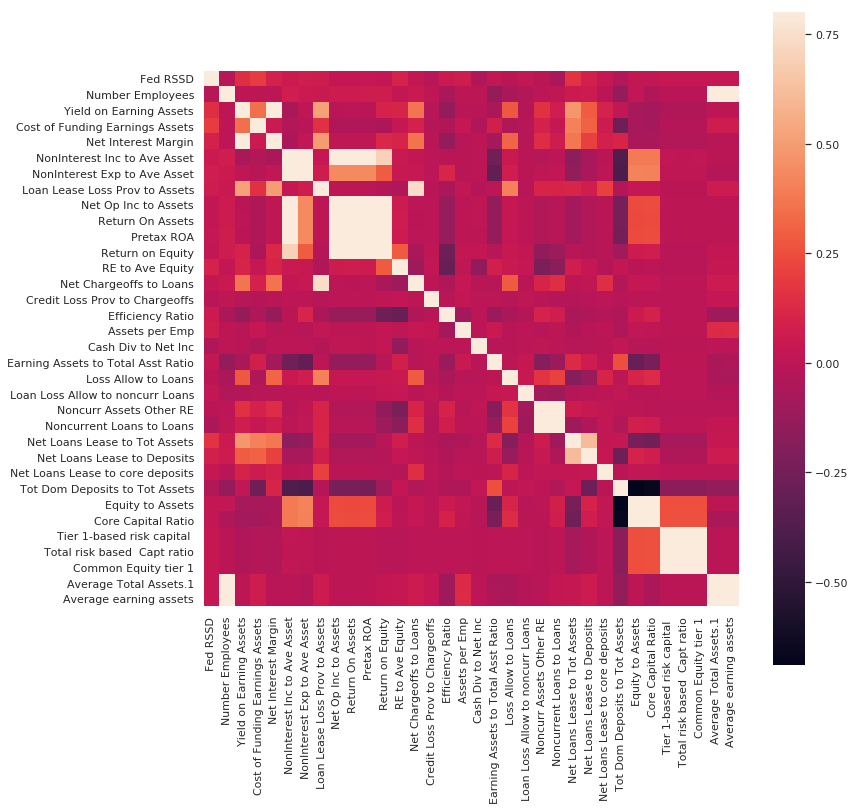

In [10]:
# Correlation visualization
corrmat = perf_rat_medium_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
# perf_rat_medium_df.corr()

### **Create list of the features with predictive power using Statistica**

In [12]:
perf_rat_medium_df.to_csv('Data/car_v4_perfrat.csv')

<img src="Data/Features.png"
    style="width:1800px; float: right; margin: 0 40px 40px 40px;"></img>

### **Create dataset with most predictive features**

In [13]:
features_df = perf_rat_medium_df[['Tot Dom Deposits to Tot Assets', 'Return On Assets', 'Net Op Inc to Assets','Pretax ROA',  
                                'Assets per Emp', 'NonInterest Inc to Ave Asset', 'NonInterest Exp to Ave Asset', 
                                'Yield on Earning Assets', 'Net Loans Lease to Tot Assets', 'RE to Ave Equity', 
                                'Net Interest Margin', 'Efficiency Ratio', 'Core Capital Ratio', 'Equity to Assets',
                                'Noncurr Assets Other RE', 'Cost of Funding Earnings Assets', 'Noncurrent Loans to Loans',
                                'Number Employees', 'Return on Equity']]
features_df.columns

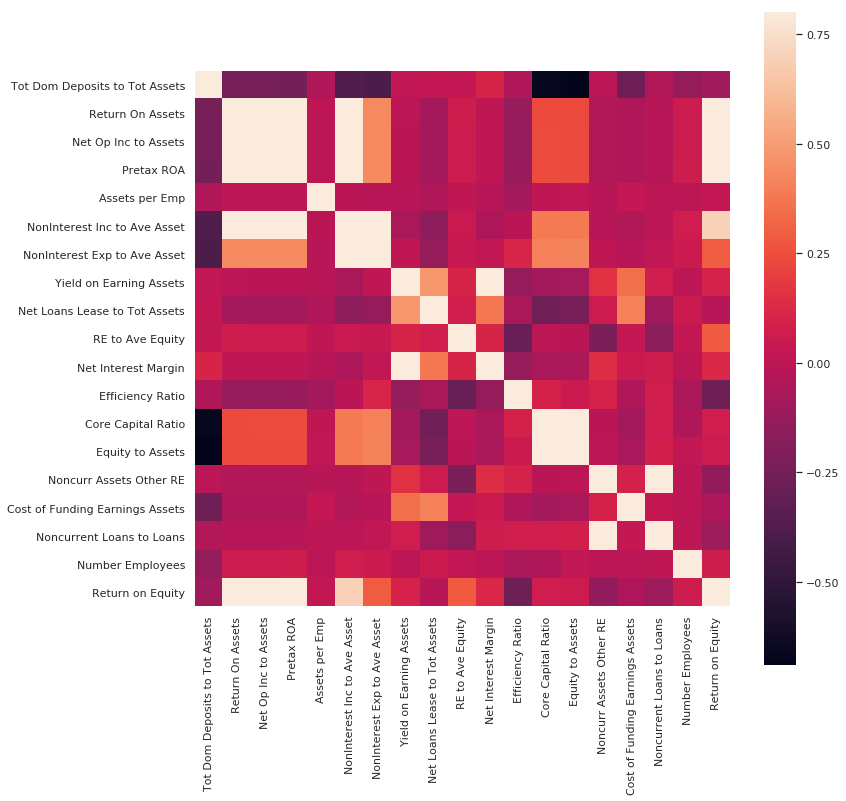

In [14]:
# Correlation visualization
corrmat = features_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

### **Normalize features dataset**
#### **Remove any values that exceed +- 3 standard devations from the mean.**

In [15]:
upper_limit = features_df['Tot Dom Deposits to Tot Assets'].mean() + 3 * features_df['Tot Dom Deposits to Tot Assets'].std()
lower_limit = features_df['Tot Dom Deposits to Tot Assets'].mean() - 3 * features_df['Tot Dom Deposits to Tot Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = features_df.loc[(features_df['Tot Dom Deposits to Tot Assets'] > lower_limit) & (features_df['Tot Dom Deposits to Tot Assets'] < upper_limit)]

lower: 59.13113594889433 upper: 107.06760604194434


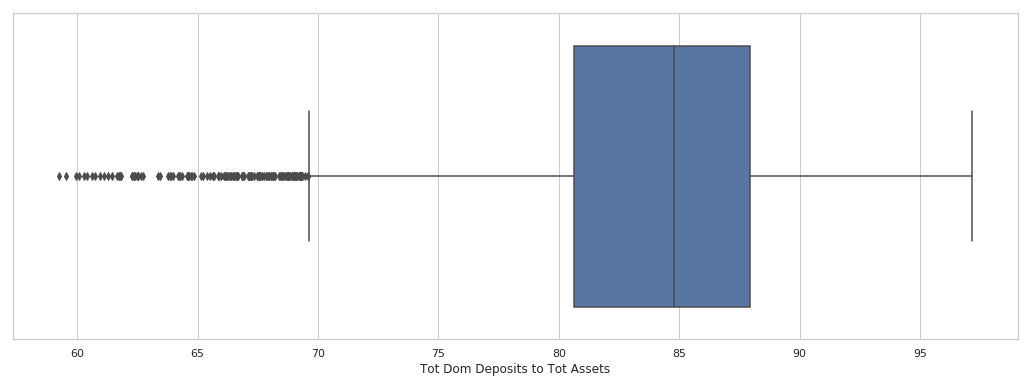

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df["Tot Dom Deposits to Tot Assets"])

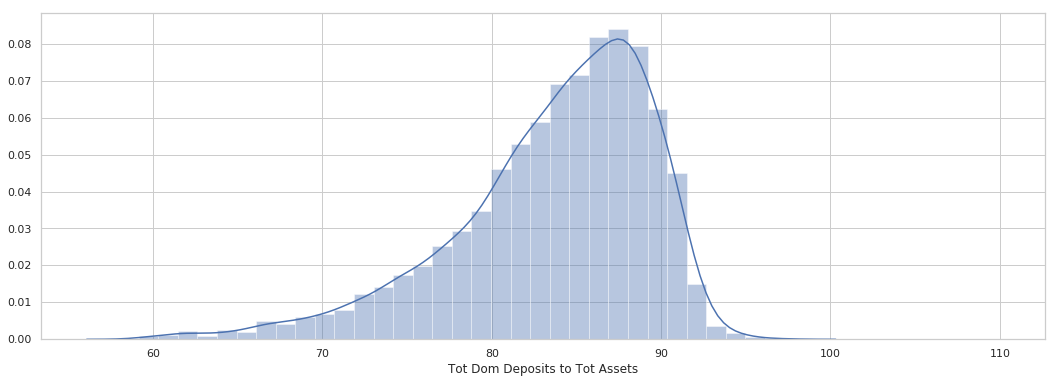

In [17]:
sns.distplot(modified_df['Tot Dom Deposits to Tot Assets'],hist_kws={"range": [58,110]})

In [18]:
upper_limit = modified_df['Return On Assets'].mean() + 3 * modified_df['Return On Assets'].std()
lower_limit = modified_df['Return On Assets'].mean() - 3 * modified_df['Return On Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Return On Assets'] > lower_limit) & (modified_df['Return On Assets'] < upper_limit)]

lower: -1.0198380695563751 upper: 3.2110867615162864


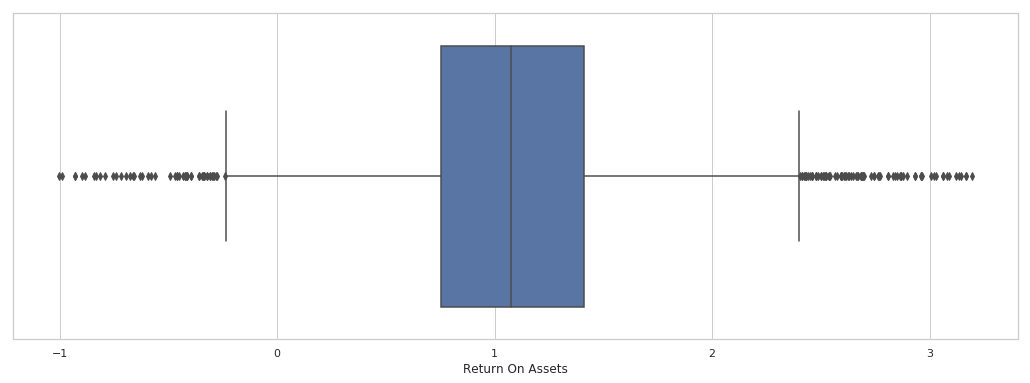

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Return On Assets'])

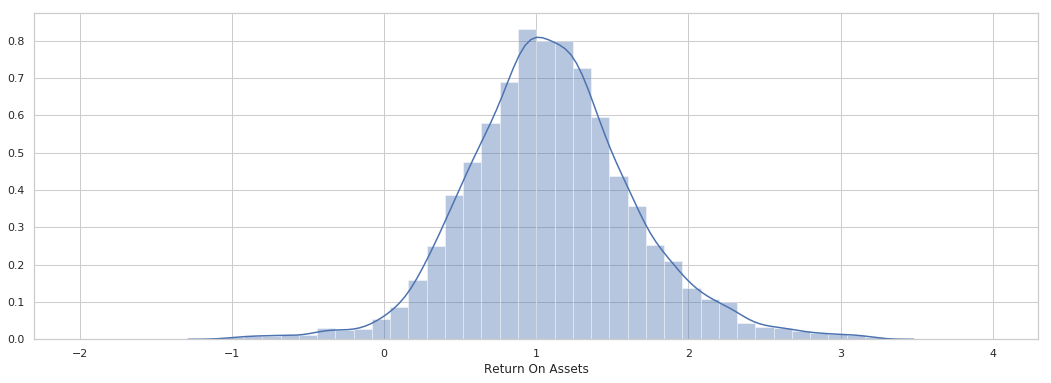

In [20]:
sns.distplot(modified_df['Return On Assets'],hist_kws={"range": [-2,4]})

In [21]:
upper_limit = modified_df['Net Op Inc to Assets'].mean() + 3 * modified_df['Net Op Inc to Assets'].std()
lower_limit = modified_df['Net Op Inc to Assets'].mean() - 3 * modified_df['Net Op Inc to Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Net Op Inc to Assets'] > lower_limit) & (modified_df['Net Op Inc to Assets'] < upper_limit)]

lower: -0.5475246886998575 upper: 2.748346949961718


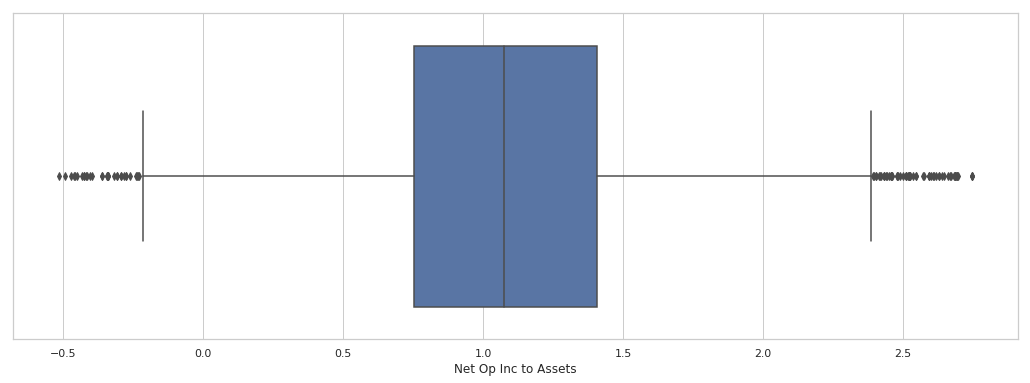

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Net Op Inc to Assets'])

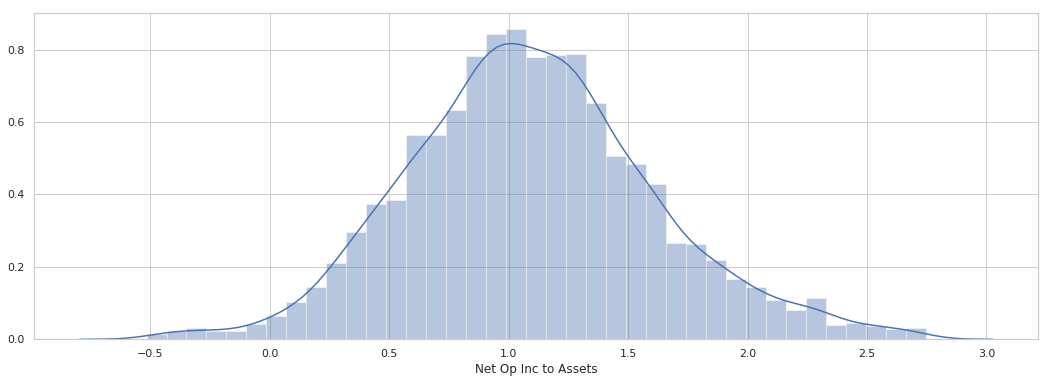

In [23]:
sns.distplot(modified_df['Net Op Inc to Assets'],hist_kws={"range": [-0.6,3]})

In [24]:
upper_limit = modified_df['Pretax ROA'].mean() + 3 * modified_df['Pretax ROA'].std()
lower_limit = modified_df['Pretax ROA'].mean() - 3 * modified_df['Pretax ROA'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Pretax ROA'] > lower_limit) & (modified_df['Pretax ROA'] < upper_limit)]

lower: -0.47188981876751424 upper: 3.005419703942862


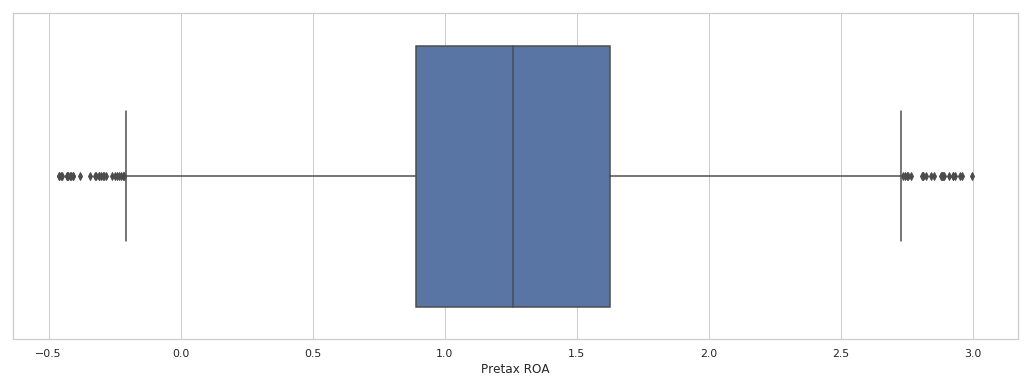

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Pretax ROA'])

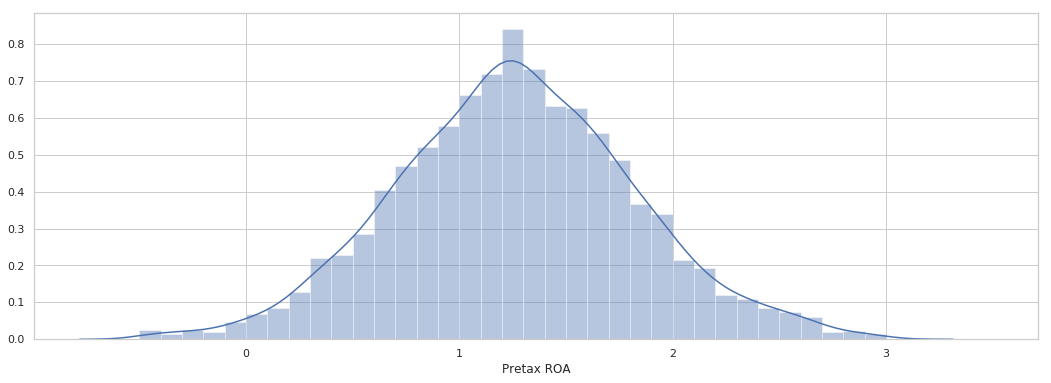

In [26]:
sns.distplot(modified_df['Pretax ROA'],hist_kws={"range": [-0.5,3.5]})

In [27]:
upper_limit = modified_df['Assets per Emp'].mean() + 3 * modified_df['Assets per Emp'].std()
lower_limit = modified_df['Assets per Emp'].mean() - 3 * modified_df['Assets per Emp'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Assets per Emp'] > lower_limit) & (modified_df['Assets per Emp'] < upper_limit)]

lower: -17.62259478780502 upper: 29.159153503723395


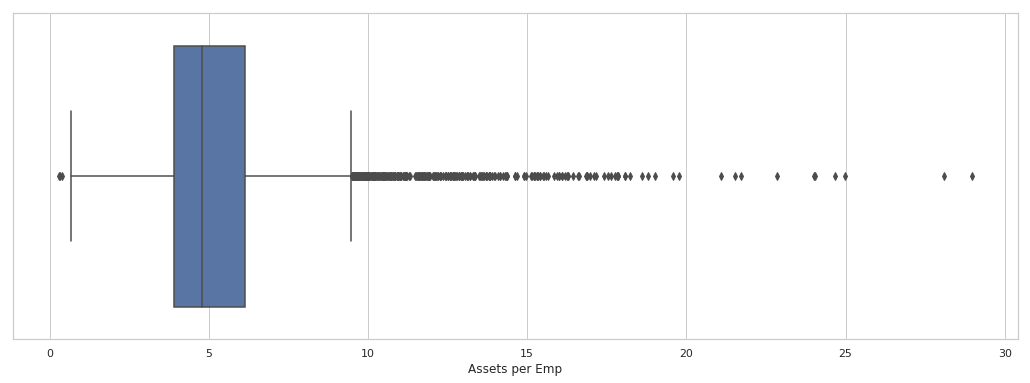

In [28]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Assets per Emp'])

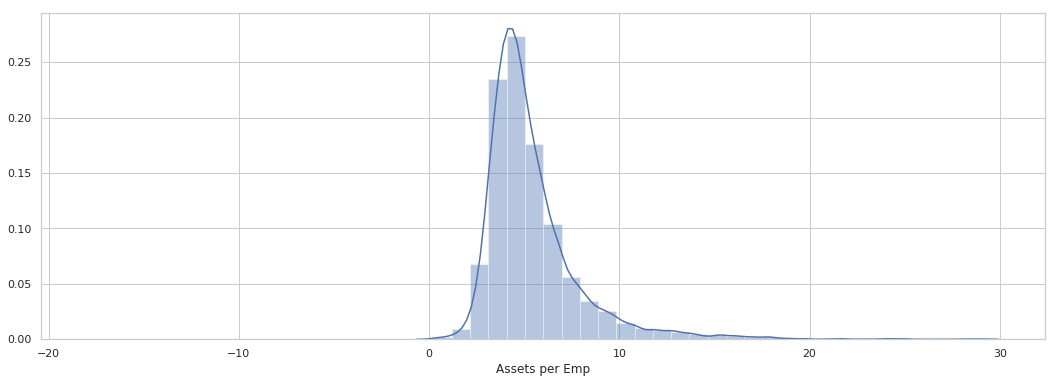

In [29]:
sns.distplot(modified_df['Assets per Emp'],hist_kws={"range": [-18,30]})

In [30]:
upper_limit = modified_df['NonInterest Inc to Ave Asset'].mean() + 3 * modified_df['NonInterest Inc to Ave Asset'].std()
lower_limit = modified_df['NonInterest Inc to Ave Asset'].mean() - 3 * modified_df['NonInterest Inc to Ave Asset'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['NonInterest Inc to Ave Asset'] > lower_limit) & (modified_df['NonInterest Inc to Ave Asset'] < upper_limit)]

lower: -3.1087237645826926 upper: 4.553797104336778


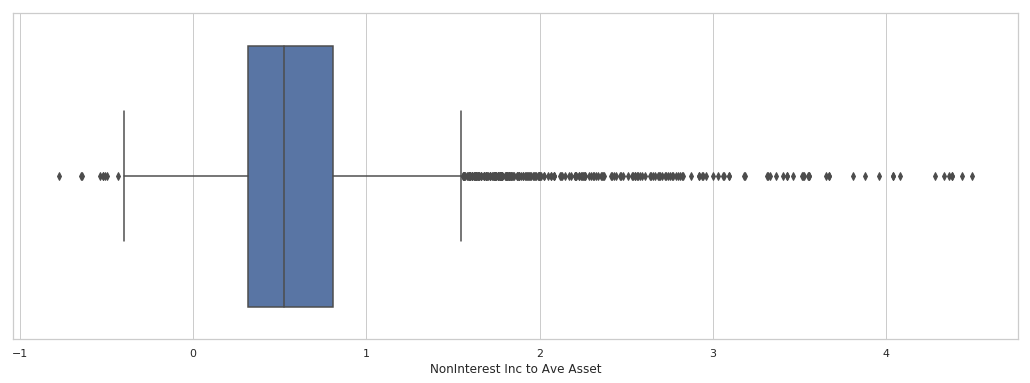

In [31]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['NonInterest Inc to Ave Asset'])

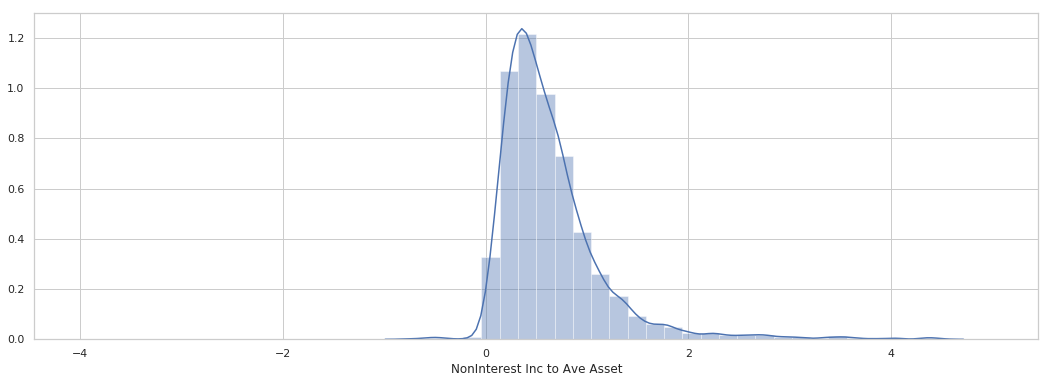

In [32]:
sns.distplot(modified_df['NonInterest Inc to Ave Asset'],hist_kws={"range": [-4,5]})

In [33]:
upper_limit = modified_df['NonInterest Exp to Ave Asset'].mean() + 3 * modified_df['NonInterest Exp to Ave Asset'].std()
lower_limit = modified_df['NonInterest Exp to Ave Asset'].mean() - 3 * modified_df['NonInterest Exp to Ave Asset'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['NonInterest Exp to Ave Asset'] > lower_limit) & (modified_df['NonInterest Exp to Ave Asset'] < upper_limit)]

lower: 0.3835191829686653 upper: 5.201360258133574


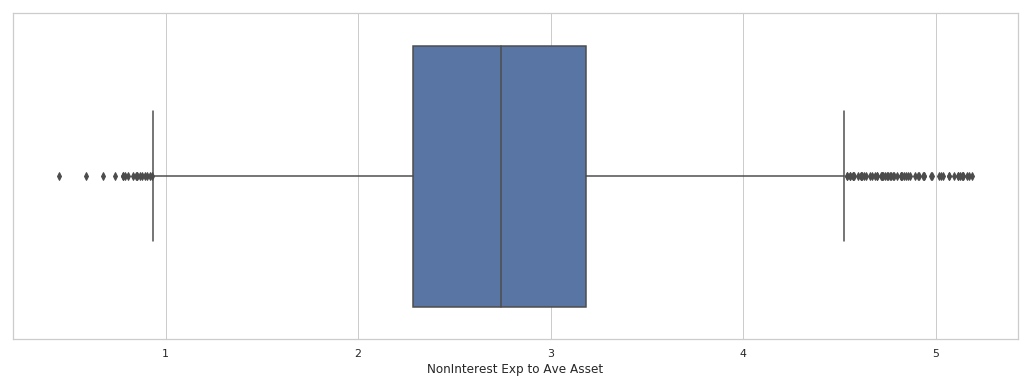

In [34]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['NonInterest Exp to Ave Asset'])

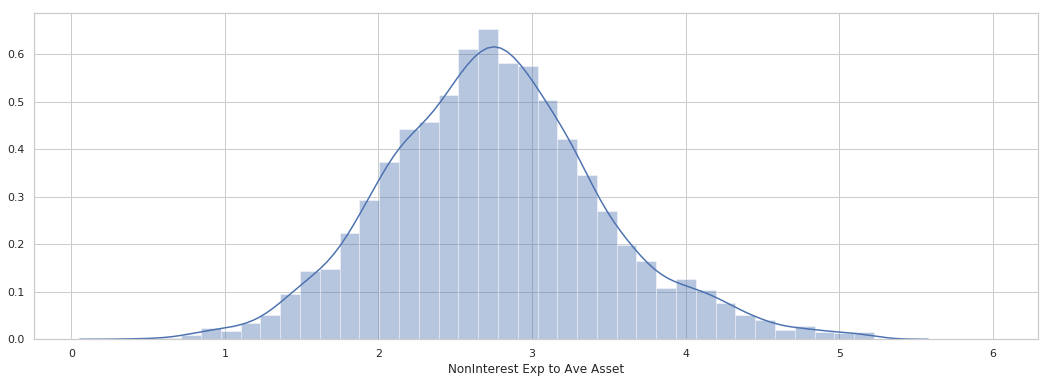

In [35]:
sns.distplot(modified_df['NonInterest Exp to Ave Asset'],hist_kws={"range": [0.2,6]})

In [36]:
upper_limit = modified_df['Yield on Earning Assets'].mean() + 3 * modified_df['Yield on Earning Assets'].std()
lower_limit = modified_df['Yield on Earning Assets'].mean() - 3 * modified_df['Yield on Earning Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Yield on Earning Assets'] > lower_limit) & (modified_df['Yield on Earning Assets'] < upper_limit)]

lower: 2.2485332139352794 upper: 6.417430540185079


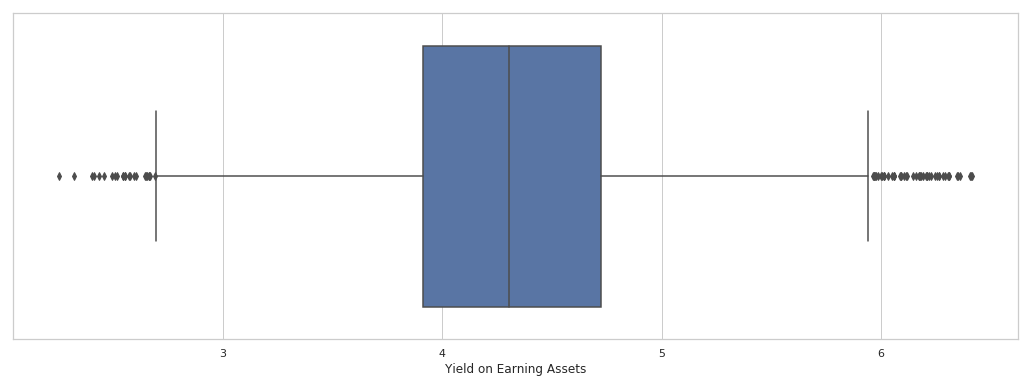

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Yield on Earning Assets'])

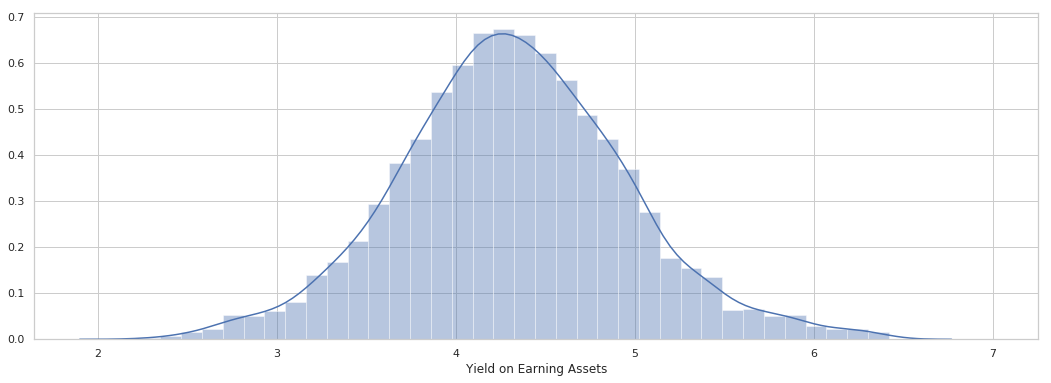

In [38]:
sns.distplot(modified_df['Yield on Earning Assets'],hist_kws={"range": [2,7]})

In [39]:
upper_limit = modified_df['Net Loans Lease to Tot Assets'].mean() + 3 * modified_df['Net Loans Lease to Tot Assets'].std()
lower_limit = modified_df['Net Loans Lease to Tot Assets'].mean() - 3 * modified_df['Net Loans Lease to Tot Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Net Loans Lease to Tot Assets'] > lower_limit) & (modified_df['Net Loans Lease to Tot Assets'] < upper_limit)]

lower: 20.721949311432006 upper: 112.29862404524167


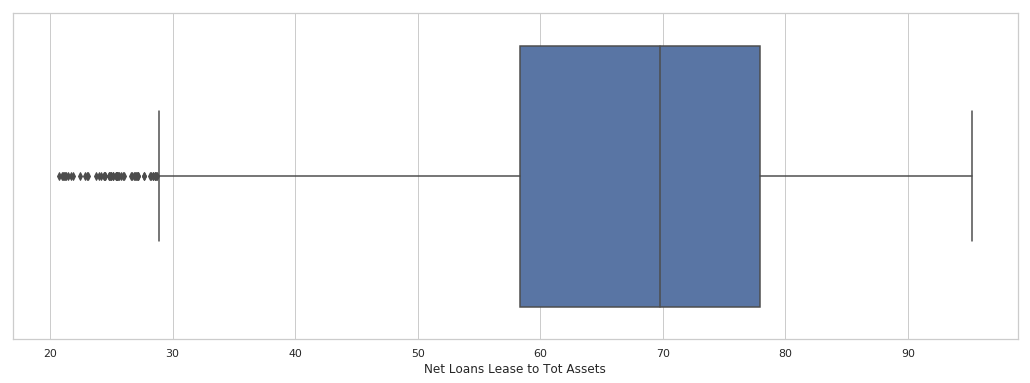

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Net Loans Lease to Tot Assets'])

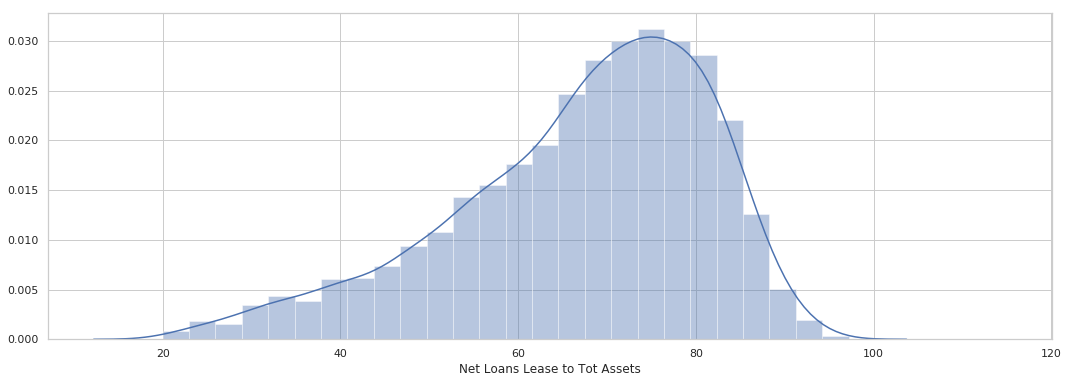

In [41]:
sns.distplot(modified_df['Net Loans Lease to Tot Assets'],hist_kws={"range": [20, 115]})

In [42]:
upper_limit = modified_df['RE to Ave Equity'].mean() + 3 * modified_df['RE to Ave Equity'].std()
lower_limit = modified_df['RE to Ave Equity'].mean() - 3 * modified_df['RE to Ave Equity'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['RE to Ave Equity'] > lower_limit) & (modified_df['RE to Ave Equity'] < upper_limit)]

lower: -10.157946890878353 upper: 21.66126155319917


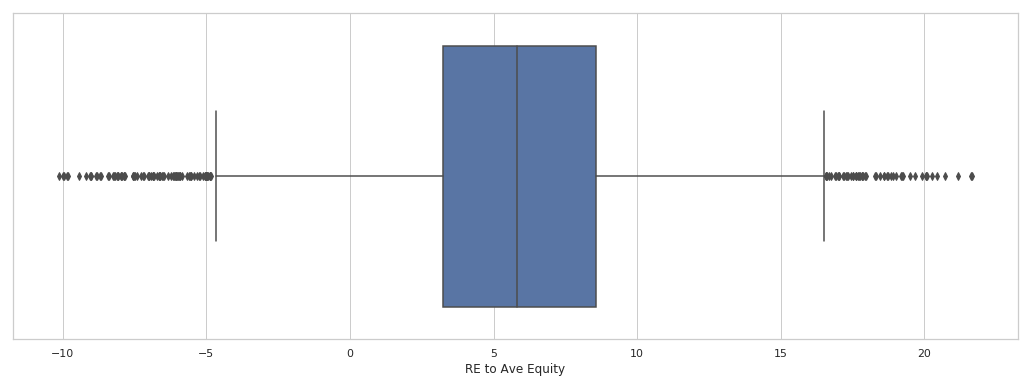

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['RE to Ave Equity'])

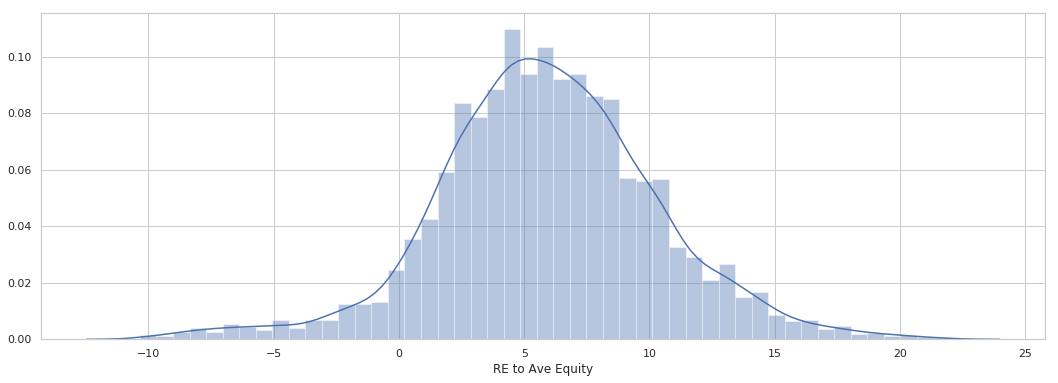

In [44]:
sns.distplot(modified_df['RE to Ave Equity'],hist_kws={"range": [-11,22]})

In [45]:
upper_limit = modified_df['Net Interest Margin'].mean() + 3 * modified_df['Net Interest Margin'].std()
lower_limit = modified_df['Net Interest Margin'].mean() - 3 * modified_df['Net Interest Margin'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Net Interest Margin'] > lower_limit) & (modified_df['Net Interest Margin'] < upper_limit)]

lower: 1.9668359436766296 upper: 5.561874531940617


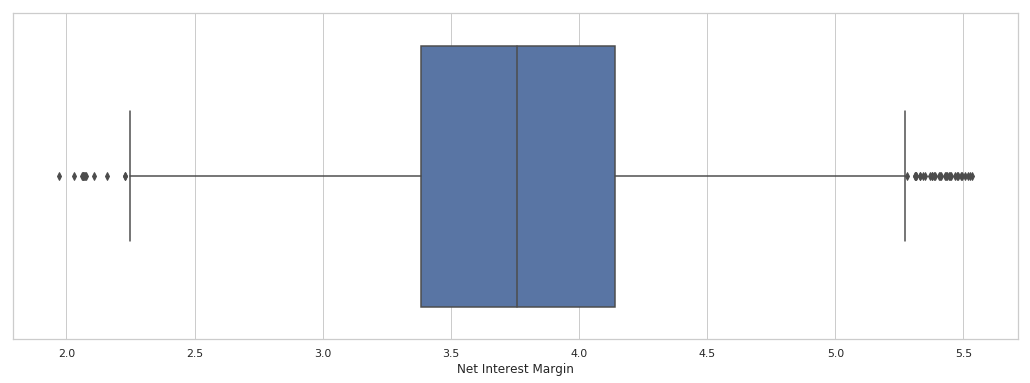

In [46]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Net Interest Margin'])

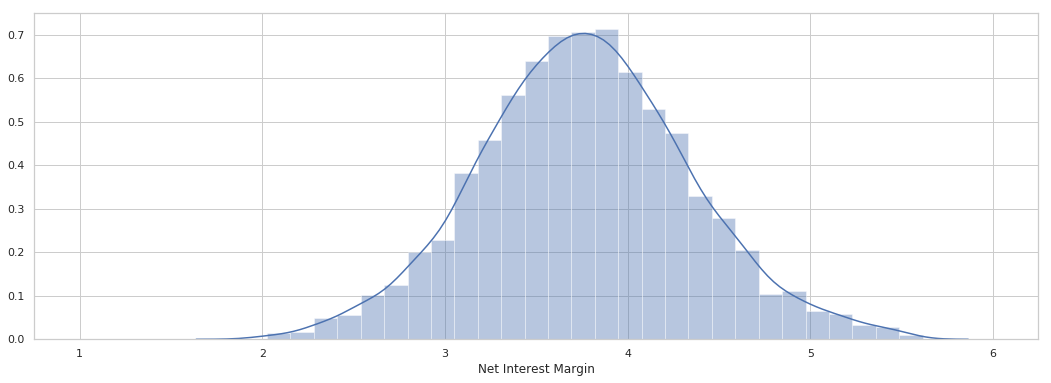

In [47]:
sns.distplot(modified_df['Net Interest Margin'],hist_kws={"range": [1.0,6]})

In [48]:
upper_limit = modified_df['Efficiency Ratio'].mean() + 3 * modified_df['Efficiency Ratio'].std()
lower_limit = modified_df['Efficiency Ratio'].mean() - 3 * modified_df['Efficiency Ratio'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Efficiency Ratio'] > lower_limit) & (modified_df['Efficiency Ratio'] < upper_limit)]

lower: 29.266755046829452 upper: 104.51541015742183


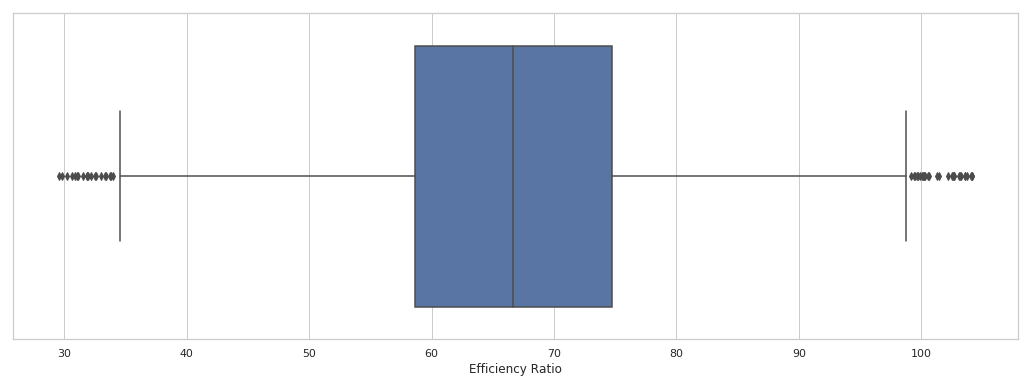

In [49]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Efficiency Ratio'])

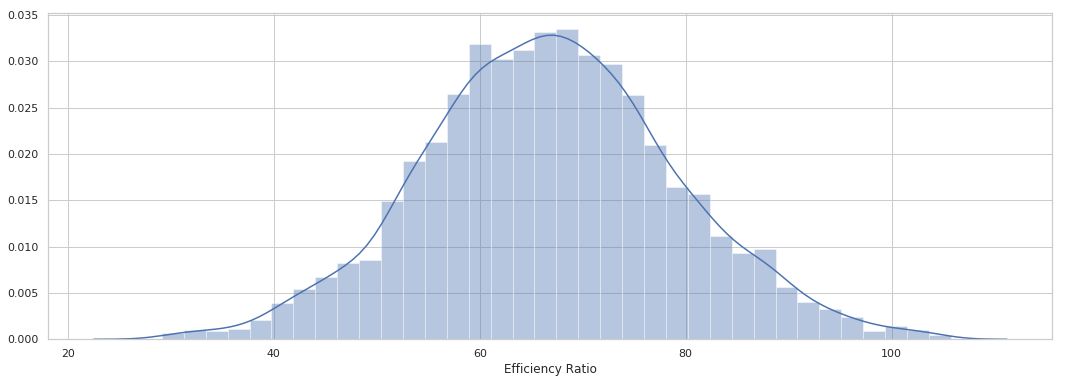

In [50]:
sns.distplot(modified_df['Efficiency Ratio'],hist_kws={"range": [27,110]})

In [51]:
upper_limit = modified_df['Core Capital Ratio'].mean() + 3 * modified_df['Core Capital Ratio'].std()
lower_limit = modified_df['Core Capital Ratio'].mean() - 3 * modified_df['Core Capital Ratio'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Core Capital Ratio'] > lower_limit) & (modified_df['Core Capital Ratio'] < upper_limit)]

lower: 2.316884819926619 upper: 20.364027085080707


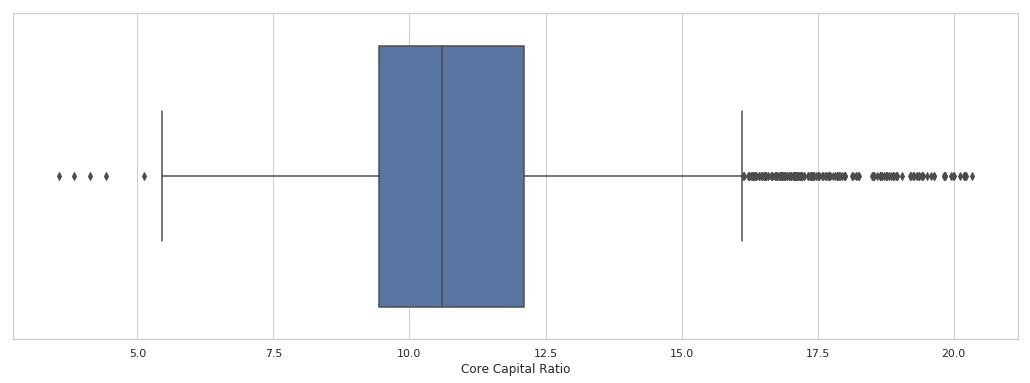

In [52]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Core Capital Ratio'])

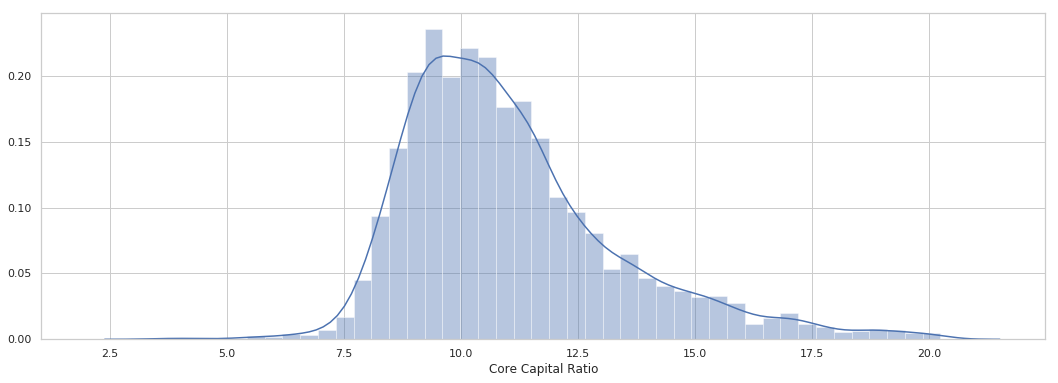

In [53]:
sns.distplot(modified_df['Core Capital Ratio'],hist_kws={"range": [2,21]})

In [54]:
upper_limit = modified_df['Equity to Assets'].mean() + 3 * modified_df['Equity to Assets'].std()
lower_limit = modified_df['Equity to Assets'].mean() - 3 * modified_df['Equity to Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Equity to Assets'] > lower_limit) & (modified_df['Equity to Assets'] < upper_limit)]

lower: 3.8304306788340607 upper: 18.330323276754413


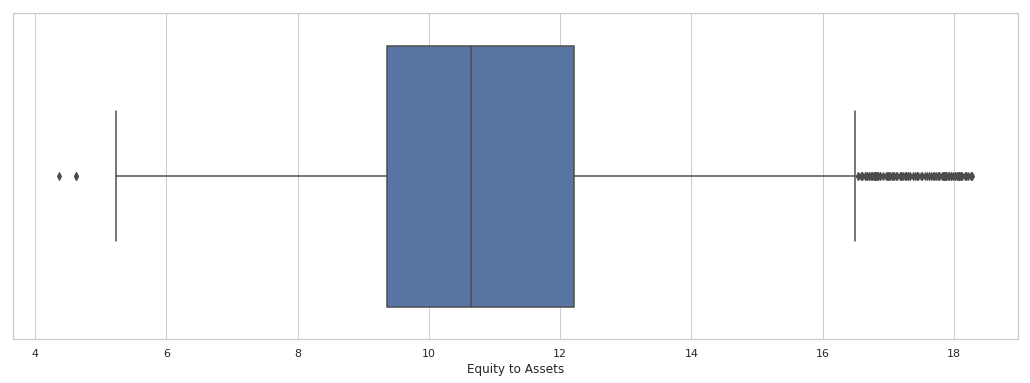

In [55]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Equity to Assets'])

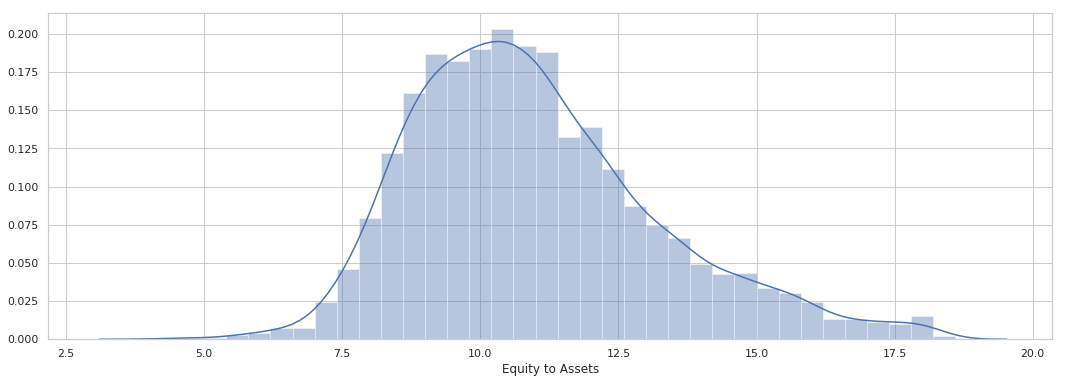

In [56]:
sns.distplot(modified_df['Equity to Assets'],hist_kws={"range": [3,19]})

In [57]:
upper_limit = modified_df['Noncurr Assets Other RE'].mean() + 3 * modified_df['Noncurr Assets Other RE'].std()
lower_limit = modified_df['Noncurr Assets Other RE'].mean() - 3 * modified_df['Noncurr Assets Other RE'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Noncurr Assets Other RE'] > lower_limit) & (modified_df['Noncurr Assets Other RE'] < upper_limit)]

lower: -2.2816209100677374 upper: 3.8642263285767027


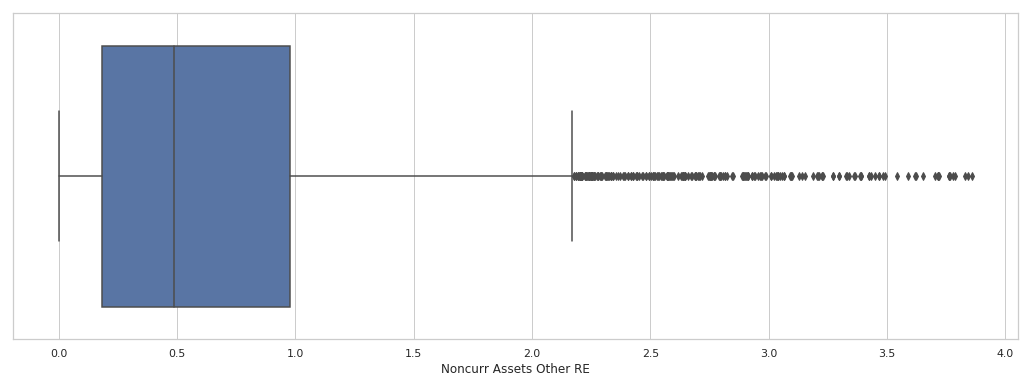

In [58]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Noncurr Assets Other RE'])

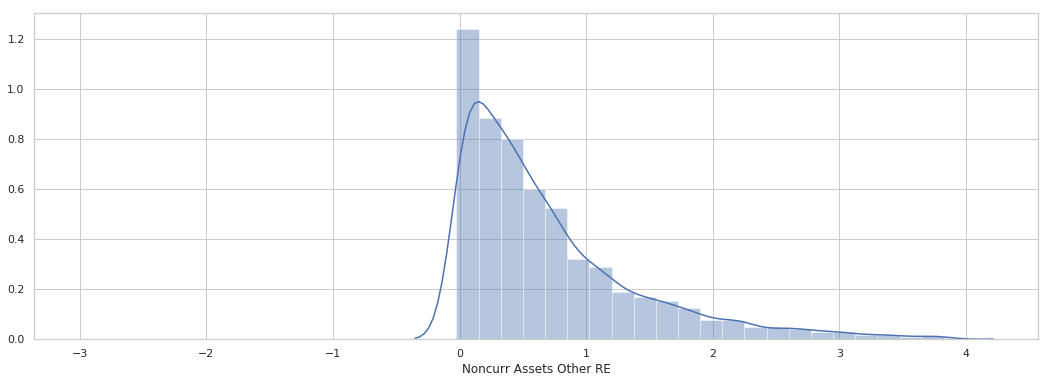

In [59]:
sns.distplot(modified_df['Noncurr Assets Other RE'],hist_kws={"range": [-3,4]})

In [60]:
upper_limit = modified_df['Cost of Funding Earnings Assets'].mean() + 3 * modified_df['Cost of Funding Earnings Assets'].std()
lower_limit = modified_df['Cost of Funding Earnings Assets'].mean() - 3 * modified_df['Cost of Funding Earnings Assets'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Cost of Funding Earnings Assets'] > lower_limit) & (modified_df['Cost of Funding Earnings Assets'] < upper_limit)]

lower: -0.27807953831038457 upper: 1.4059995021868472


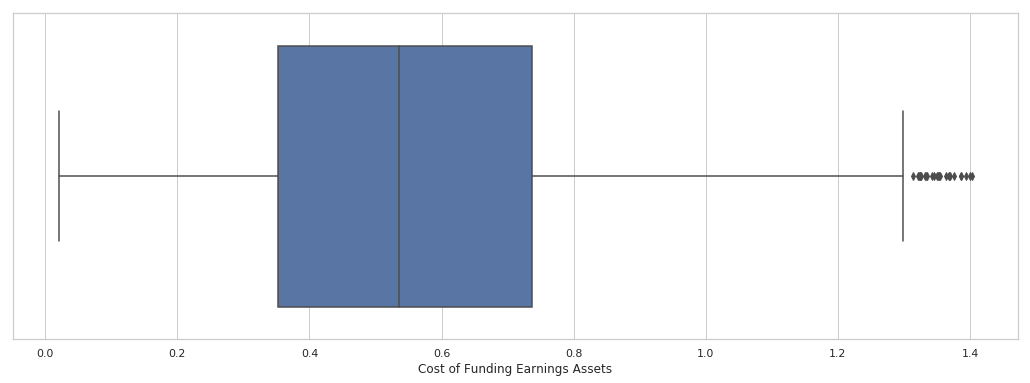

In [61]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Cost of Funding Earnings Assets'])

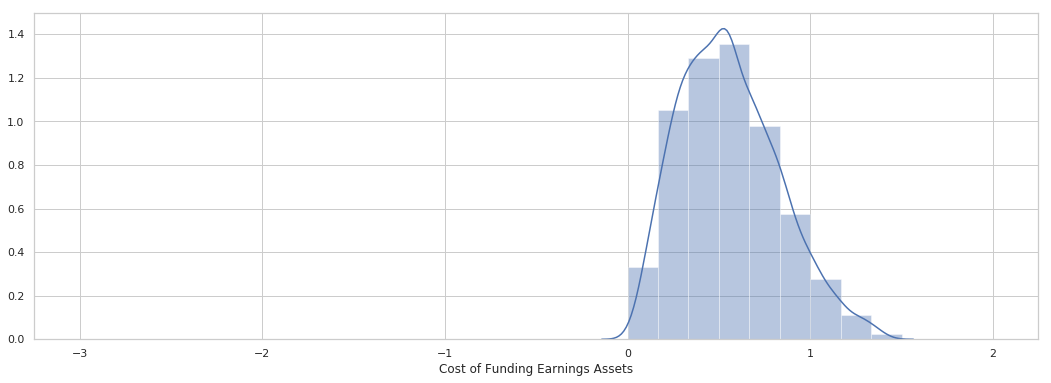

In [62]:
sns.distplot(modified_df['Cost of Funding Earnings Assets'],hist_kws={"range": [-3,2]})

In [63]:
upper_limit = modified_df['Noncurrent Loans to Loans'].mean() + 3 * modified_df['Noncurrent Loans to Loans'].std()
lower_limit = modified_df['Noncurrent Loans to Loans'].mean() - 3 * modified_df['Noncurrent Loans to Loans'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Noncurrent Loans to Loans'] > lower_limit) & (modified_df['Noncurrent Loans to Loans'] < upper_limit)]

lower: -2.0002835009403754 upper: 3.634155087642798


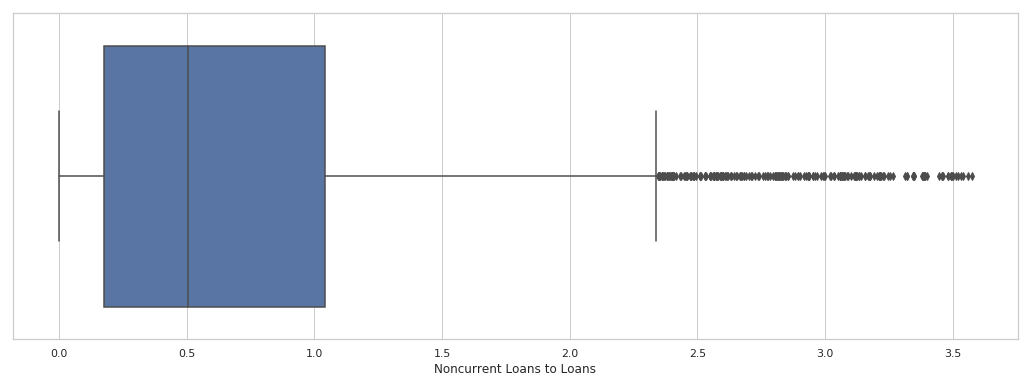

In [64]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Noncurrent Loans to Loans'])

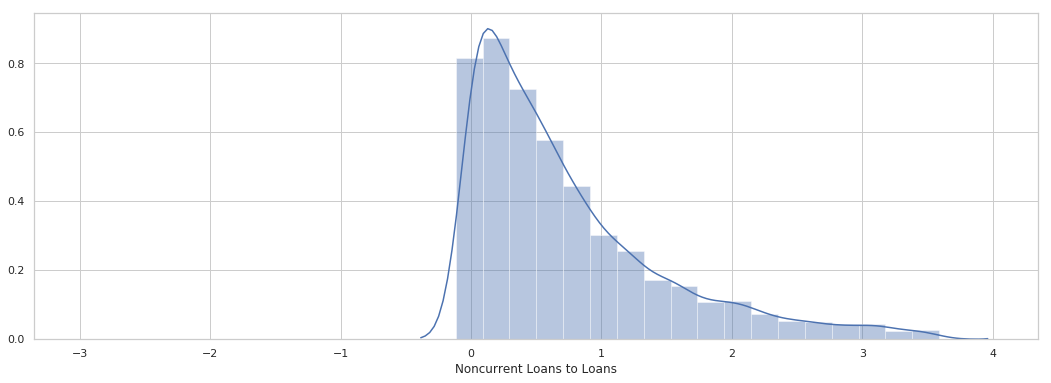

In [65]:
sns.distplot(modified_df['Noncurrent Loans to Loans'],hist_kws={"range": [-3,4]})

In [101]:
upper_limit = modified_df['Number Employees'].mean() + 3 * modified_df['Number Employees'].std()
lower_limit = modified_df['Number Employees'].mean() - 3 * modified_df['Number Employees'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Number Employees'] > lower_limit) & (modified_df['Number Employees'] < upper_limit)]

lower: -1060.916769275593 upper: 1357.4166481808968


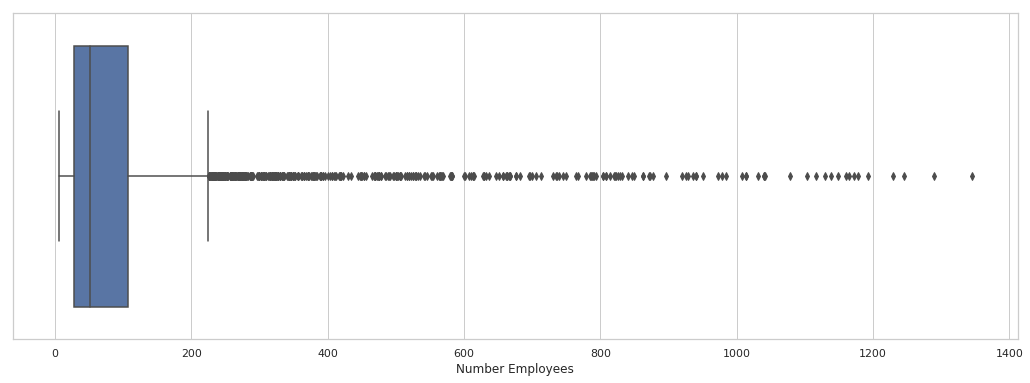

In [102]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Number Employees'])

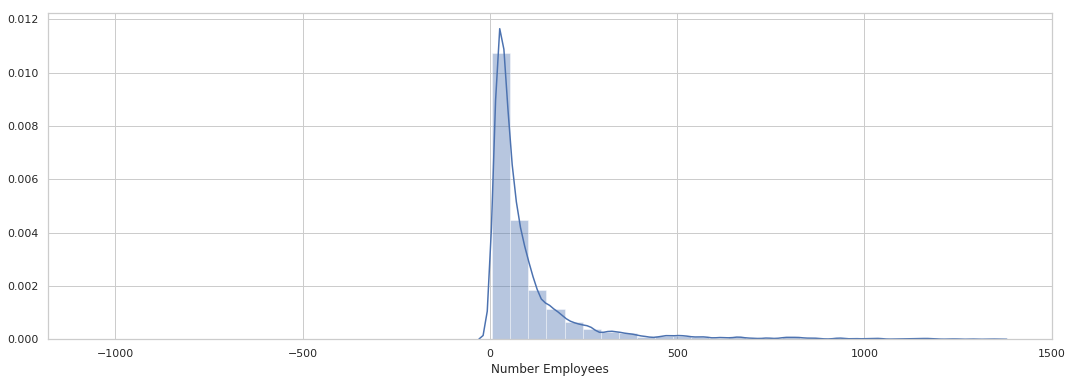

In [103]:
sns.distplot(modified_df['Number Employees'],hist_kws={"range": [-1058,1360]})

In [104]:
upper_limit = modified_df['Return on Equity'].mean() + 3 * modified_df['Return on Equity'].std()
lower_limit = modified_df['Return on Equity'].mean() - 3 * modified_df['Return on Equity'].std()
print(f"lower: {lower_limit} upper: {upper_limit}")

modified_df = modified_df.loc[(modified_df['Return on Equity'] > lower_limit) & (modified_df['Return on Equity'] < upper_limit)]

lower: -3.2926789245534724 upper: 23.8141720062779


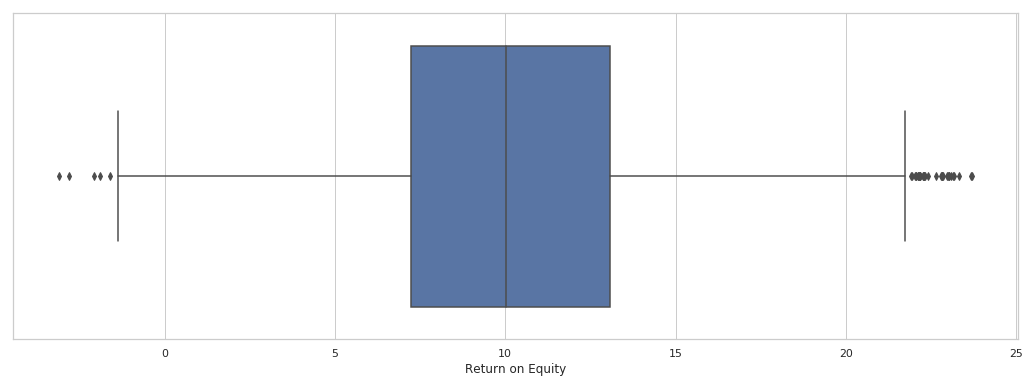

In [105]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=modified_df['Return on Equity'])

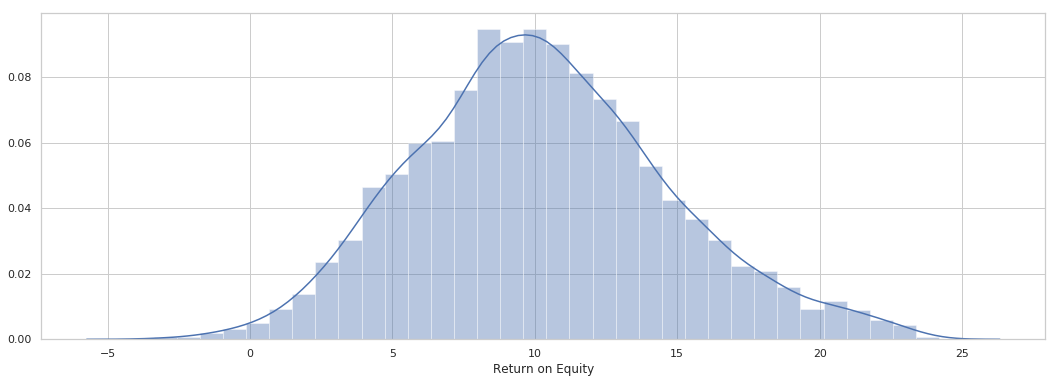

In [106]:
sns.distplot(modified_df['Return on Equity'],hist_kws={"range": [-5,25]})

In [107]:
modified_df.describe()

,Tot Dom Deposits to Tot Assets,Return On Assets,Net Op Inc to Assets,Pretax ROA,Assets per Emp,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Yield on Earning Assets,Net Loans Lease to Tot Assets,RE to Ave Equity,Net Interest Margin,Efficiency Ratio,Core Capital Ratio,Equity to Assets,Noncurr Assets Other RE,Cost of Funding Earnings Assets,Noncurrent Loans to Loans,Number Employees,Return on Equity
count,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,84.109414,1.095794,1.094397,1.263937,5.359706,0.617779,2.771512,4.330667,67.451982,6.067348,3.770966,66.957680,11.003755,10.964331,0.656673,0.559701,0.736304,103.257284,10.243785
std,5.299443,0.471327,0.471969,0.518001,2.327461,0.421806,0.663944,0.600765,14.138704,4.334013,0.573162,11.845166,2.125953,2.188526,0.643961,0.271469,0.748866,152.011193,4.485361
min,59.236484,-0.336992,-0.336992,-0.428424,1.793019,-0.519208,0.674950,2.414349,20.727275,-10.137942,1.970238,29.547170,5.122838,4.361084,0.000000,0.020584,0.000000,6.000000,-3.108808
25%,81.369592,0.779344,0.774616,0.917145,3.948155,0.328676,2.320441,3.936036,58.965849,3.454741,3.387328,58.991154,9.453538,9.369750,0.175466,0.351953,0.173670,28.000000,7.224475
50%,85.090475,1.073270,1.071374,1.256118,4.767449,0.528354,2.755120,4.316857,70.208175,6.008316,3.766200,66.889696,10.594001,10.634838,0.467198,0.536541,0.502135,52.000000,10.011739
75%,88.028986,1.395095,1.394911,1.607832,6.018370,0.793677,3.176807,4.716682,78.082251,8.649467,4.138387,74.633256,12.047618,12.164247,0.928824,0.740923,1.048791,107.000000,13.086495
max,94.100536,2.743858,2.743858,2.995673,28.106814,3.317914,5.188041,6.415682,95.219383,21.625174,5.533005,104.141291,19.943609,18.266320,3.841683,1.402933,3.575175,1345.000000,23.703534


### **Create dataset with most predictive features with no highly-correlated features.**

In [114]:
features_nocorr_df = modified_df.copy()
features_nocorr_df.drop(['Net Op Inc to Assets', 'Pretax ROA', 'NonInterest Inc to Ave Asset', 'NonInterest Exp to Ave Asset',
                  'Net Interest Margin', 'Noncurrent Loans to Loans', 'Equity to Assets'], axis=1, inplace=True)
features_nocorr_df.columns

Index(['Tot Dom Deposits to Tot Assets', 'Return On Assets', 'Assets per Emp',
       'Yield on Earning Assets', 'Net Loans Lease to Tot Assets',
       'RE to Ave Equity', 'Efficiency Ratio', 'Core Capital Ratio',
       'Noncurr Assets Other RE', 'Cost of Funding Earnings Assets',
       'Number Employees', 'Return on Equity'],
      dtype='object')

In [115]:
features_nocorr_df.describe()

,Tot Dom Deposits to Tot Assets,Return On Assets,Assets per Emp,Yield on Earning Assets,Net Loans Lease to Tot Assets,RE to Ave Equity,Efficiency Ratio,Core Capital Ratio,Noncurr Assets Other RE,Cost of Funding Earnings Assets,Number Employees,Return on Equity
count,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,84.109414,1.095794,5.359706,4.330667,67.451982,6.067348,66.957680,11.003755,0.656673,0.559701,103.257284,10.243785
std,5.299443,0.471327,2.327461,0.600765,14.138704,4.334013,11.845166,2.125953,0.643961,0.271469,152.011193,4.485361
min,59.236484,-0.336992,1.793019,2.414349,20.727275,-10.137942,29.547170,5.122838,0.000000,0.020584,6.000000,-3.108808
25%,81.369592,0.779344,3.948155,3.936036,58.965849,3.454741,58.991154,9.453538,0.175466,0.351953,28.000000,7.224475
50%,85.090475,1.073270,4.767449,4.316857,70.208175,6.008316,66.889696,10.594001,0.467198,0.536541,52.000000,10.011739
75%,88.028986,1.395095,6.018370,4.716682,78.082251,8.649467,74.633256,12.047618,0.928824,0.740923,107.000000,13.086495
max,94.100536,2.743858,28.106814,6.415682,95.219383,21.625174,104.141291,19.943609,3.841683,1.402933,1345.000000,23.703534


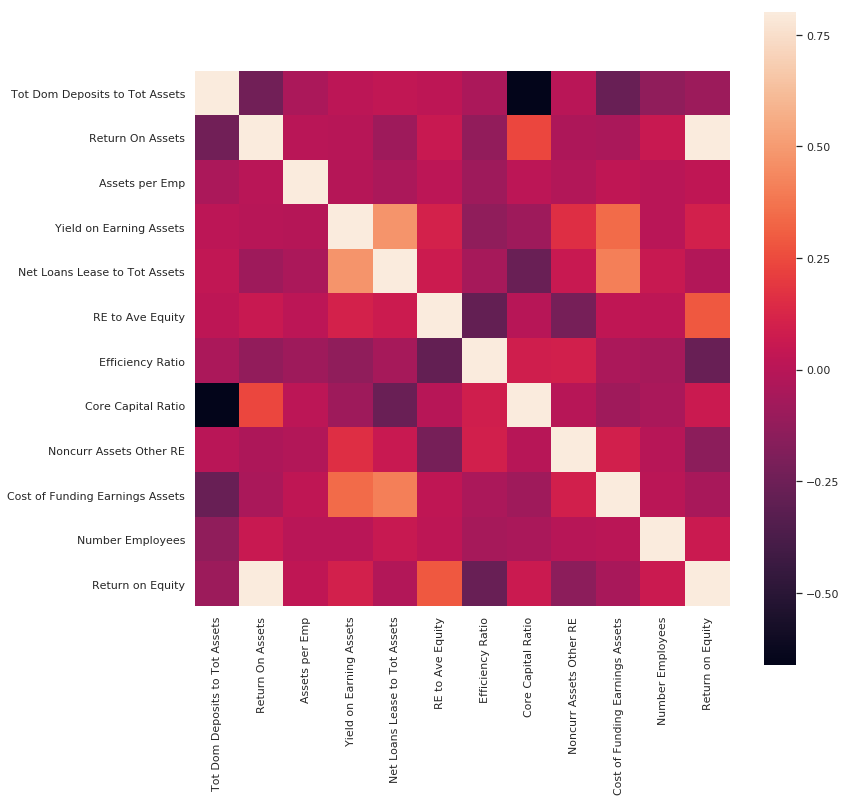

In [109]:
# Correlation visualization
corrmat = features_nocorr_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

Create CSV files for both datasets:

In [116]:
modified_df.to_csv('Data/car_v4_features.csv')
features_nocorr_df.to_csv('Data/car_v4_features_nocorr.csv')

Definition of Kurtosis https://en.wikipedia.org/wiki/Kurtosis

In [82]:
# print("Skewness: %f" % car_df['Cash Dividends'].skew())
# print("Kurtosis: %f" % car_df['Cash Dividends'].kurt())

In [83]:
# print("Skewness: %f" % car_df['Total Assets'].skew())
# print("Kurtosis: %f" % car_df['Total Assets'].kurt())

In [84]:
# scatter1 = pd.concat([car_df['Total Assets'], car_df['Cash Dividends']], axis=1)
# scatter1.plot.scatter(x='Total Assets', y='Cash Dividends')

In [85]:
# scatter1 = pd.concat([car_df['Total Assets'], car_df['Bank Equity']], axis=1)
# scatter1.plot.scatter(x='Total Assets', y='Bank Equity')

In [86]:
# car_df.plot.scatter(x='Total Assets', y='Net Income');

In [87]:
# Show correlations
# car_df.corr()

In [88]:
# Correlation visualization
# corrmat = car_df.corr()
# f, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(corrmat, vmax=.8, square=True);

Boxplot Total Assets

boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [89]:
# sns.set(style="whitegrid")
# ax = sns.boxplot(x=car_df["Total Assets"])

Pairplot


In [90]:
#sns.pairplot(car_df)

In [91]:
#sns.heatmap(car_df.corr(),cmap='coolwarm',annot=True)

In [92]:
#sns.clustermap(car_df)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
#standardizing data: Total Assets

# total_assets_standardized = StandardScaler().fit_transform(car_df['Total Assets'][:,np.newaxis]);
# low_range = total_assets_standardized[total_assets_standardized[:,0].argsort()][:20]
# high_range= total_assets_standardized[total_assets_standardized[:,0].argsort()][-20:]
# print('outer range (low) of the distribution:')
# low_range

In [95]:
# print('\nouter range (high) of the distribution:')
# high_range

There are a few high variances as seen on above columns

In [96]:
# perf_rat_medium_df.head()

In [97]:
# my_list_ratios = list(perf_rat_medium_df.columns.values)

In [98]:
# my_list_ratios